<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/DR_model_IJO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os

In [2]:
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR1', 'DR3', 'DR2']

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

train = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                    target_size=(150,150),
                                    class_mode='categorical')
val = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                    target_size=(150,150),
                                    class_mode='categorical')
test = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                    target_size=(150,150),
                                    class_mode='categorical')


Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 700928)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       2,102,787 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,103,683 (8.02 MB)

 Trainable params: 2,103,683 (8.02 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(train, epochs=10, validation_data=val, batch_size=32)
model.save('model.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.2435 - loss: 7.5992 - val_accuracy: 0.3571 - val_loss: 10.3756
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 660ms/step - accuracy: 0.3761 - loss: 11.6925 - val_accuracy: 0.5714 - val_loss: 9.2345
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.5056 - loss: 7.0719 - val_accuracy: 0.5714 - val_loss: 2.2384
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 671ms/step - accuracy: 0.6064 - loss: 3.2282 - val_accuracy: 0.5714 - val_loss: 3.9990
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5206 - loss: 3.9267 - val_accuracy: 0.5714 - val_loss: 0.9121
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 643ms/step - accuracy: 0.6693 - loss: 2.0706 - val_accuracy: 0.6429 - val_loss: 0.7415
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 657ms/step - accuracy: 0.8684 - loss: 0.6114 - val_accuracy: 0.7857 - val_loss: 1.0490
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7326 - loss: 0.7590 - val_accuracy: 0.7143 - val_loss: 0.9352
Epo

In [7]:
model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step - accuracy: 0.6429 - loss: 0.9123


[0.9123090505599976, 0.6428571343421936]

In [8]:
y_true=test.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [33]:
y_pred=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


In [34]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1])

In [35]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[2, 1, 0],
       [0, 6, 0],
       [1, 3, 1]])

In [36]:
print(metrics.classification_report(y_true, y_pred1,
      target_names=['dr1','dr2','dr3']))

              precision    recall  f1-score   support

         dr1       0.67      0.67      0.67         3
         dr2       0.60      1.00      0.75         6
         dr3       1.00      0.20      0.33         5

    accuracy                           0.64        14
   macro avg       0.76      0.62      0.58        14
weighted avg       0.76      0.64      0.58        14



In [37]:
test.class_indices

{'DR1': 0, 'DR2': 1, 'DR3': 2}

In [38]:
metrics.accuracy_score(y_true, y_pred1)

0.6428571428571429

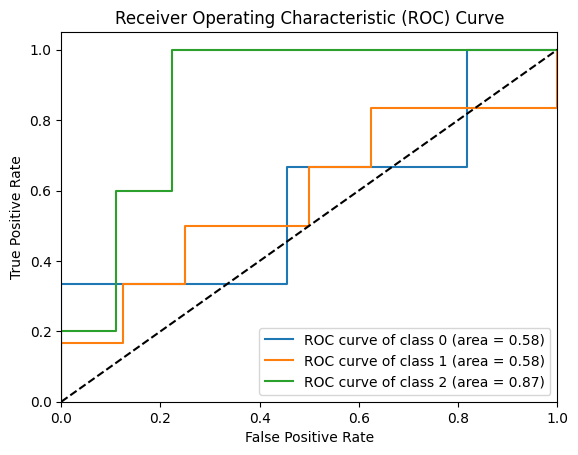

In [ ]:
# prompt: Roc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_true, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


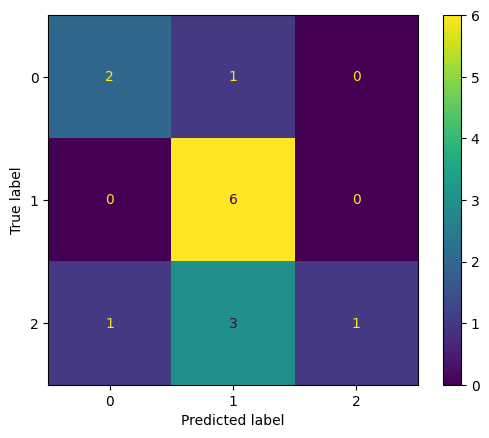

In [39]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)